In [1]:
import pandas as pd
import warnings

In [27]:
def read_epw(file,year=None):
    """
    Read EPW file 
    
    Arguments:
    ----------
    file -- path location of EPW file
    year -- None default to leave intact the year or change if desired. It raises a warning.
    
    Properties:
    data -- pandas dataframe with data extracted of SQL file
    variables -- name of variables using energyplus notation
    vars -- ??
    vars_numbered -- ??
    mlc -- ??
    construction_systems -- Construction Systems found inside SQL file
    """
  
    nombres = ['Year',
               'Month',
               'Day',
               'Hour',
               'Minute',
               'Data Source and Uncertainty Flags',
               'Dry Bulb Temperature',
               'Dew Point Temperature',
               'Relative Humidity',
               'Atmospheric Station Pressure',
               'Extraterrestrial Horizontal Radiation',
               'Extraterrestrial Direct Normal Radiation',
               'Horizontal Infrared Radiation Intensity',
               'Global Horizontal Radiation',
               'Direct Normal Radiation',
               'Diffuse Horizontal Radiation',
               'Global Horizontal Illuminance',
               'Direct Normal Illuminance',
               'Diffuse Horizontal Illuminance',
               'Zenith Luminance',
               'Wind Direction',
               'Wind Speed',
               'Total Sky Cover',
               'Opaque Sky Cover',
               'Visibility',
               'Ceiling Height',
               'Present Weather Observation']
    data = pd.read_csv(file,skiprows=8,header=None,names=nombres,usecols=range(27))
    data.Minute = 0
    data.loc[data.Hour==24,['Hour','Minute']] = [23,59]
    if year != None:
        data.Year = year
        warnings.warn("Year has been changed, be carefull")
    data['tiempo'] = data.Year.astype('str') + '-' + data.Month.astype('str')  + '-' + data.Day.astype('str') + ' ' + data.Hour.astype('str') + ':' + data.Minute.astype('str') 
    data.tiempo = pd.to_datetime(data.tiempo,format='%Y-%m-%d %H:%M')
    data.set_index('tiempo',inplace=True)
    del data['Year']
    del data['Month']
    del data['Day']
    del data['Hour']
    del data['Minute']
    return data

In [28]:
f = '../data/Cuernavaca_MEX_MOR.epw'
cuerna = read_epw(f,year=1978)
# cuerna.read_epw(file=f,year=1978)

<ipython-input-27-9314229f0d11>:51: UserWarning: Year has been changed, be carefull
  warnings.warn("Year has been changed, be carefull")


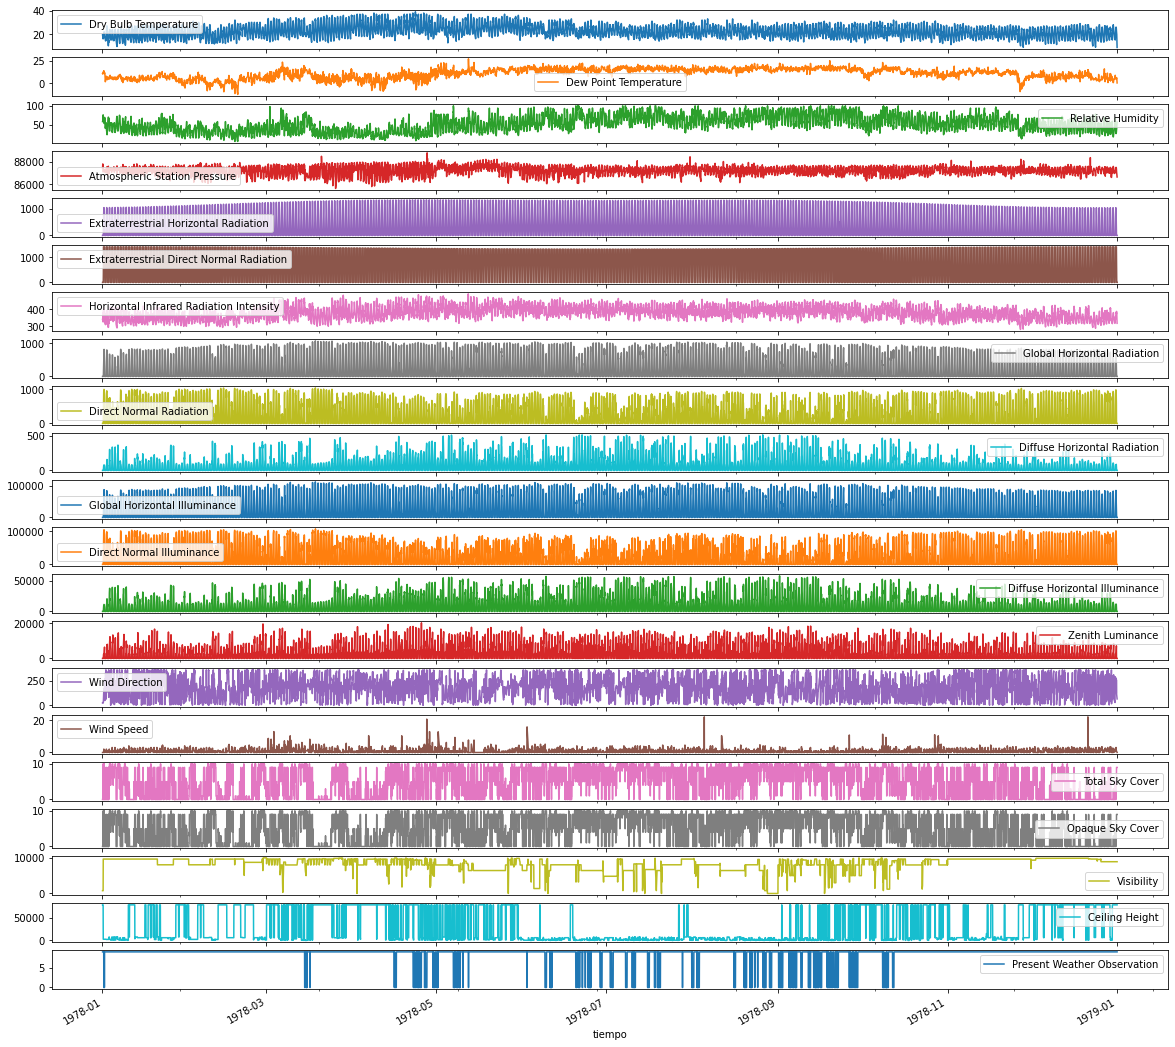

In [29]:
cuerna.plot(subplots=True,figsize=(20,20));

In [ ]:
epw.read_epw()